In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

/tmp/ipykernel_124728/3274186680.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import torch

torch.cuda.is_available()
#!/usr/bin/env python3

import sys,os
from elftools.elf.elffile import ELFFile
from elftools.elf.segments import Segment
from capstone import *
from capstone.x86 import *

import os
import json 

import sys,os
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


# DATASET GENERATION

# Creating the pipeline

In [4]:

MAX_TOKEN_LEN = 1024
BATCH_SIZE = 40
epochs = 10

EXPERIMENT_NAME = 'cusTokenizer_UNI_35k_ASIS'
new_vocab_size = 35000
# disassembly_decimal disassembly_all_number_to_words disassembly_decimal 
data_key = "disassembly_decimal"


from transformers import BertTokenizer, BertForNextSentencePrediction,BertForPreTraining,BertConfig,AutoModelForMaskedLM,get_linear_schedule_with_warmup ,BertForSequenceClassification
import torch
from transformers import PreTrainedTokenizerFast ,AutoModelForPreTraining
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer = PreTrainedTokenizerFast.from_pretrained("./../models/" + EXPERIMENT_NAME)
print(tokenizer.pad_token) 



config = BertConfig.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
# Change max_position_embeddings to 1024 in the config
config.max_position_embeddings = 1024
# Load the model with the modified config
model = BertForSequenceClassification(config)
# Access and modify the positional embeddings
# The model's `bert` attribute holds the BERT layers
model_bert = model.bert  # This is the BERT model itself (the backbone)
# Resize the position embeddings to accommodate the new max length (1024 tokens)
model_bert.embeddings.position_embeddings = torch.nn.Embedding(1024, model_bert.config.hidden_size)
# Optional: Initialize the new embeddings using the original ones for the first 512 positions
with torch.no_grad():
    model_bert.embeddings.position_embeddings.weight[:512, :] = model_bert.embeddings.position_embeddings.weight[:512, :]


model.resize_token_embeddings(new_vocab_size)

# and move our model over to the selected device
model.to(device)

[PAD]


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 384, padding_idx=0)
      (position_embeddings): Embedding(1024, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1

In [26]:
def generate_param_string(param_list):


    if len(param_list)==0:
        return 'void'
    else:
        return " ".join(param_list)

In [27]:



DATA_PATH = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions'

TRAIN_DATA_PATH  ='/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/train/'

TEST_DATA_PATH   = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/test/'




train_json_files = [os.path.join(TRAIN_DATA_PATH, f) for f in os.listdir(TRAIN_DATA_PATH) ]

test_json_files = [os.path.join(TEST_DATA_PATH, f) for f in os.listdir(TEST_DATA_PATH) ]






def read_corpus(json_files):

    all = []
    all_params = []
    all_returns = []

    for k, j_file in enumerate(json_files):
        # if k>100:
        #     break
        try:

            with open(j_file, 'r') as file:
                data = json.load(file)

                funct = data[data_key]['input']
                
                all.append(funct)

                all_params.append( generate_param_string( data['signature']['paramTypes'] ) )
                all_returns.append(  data['signature']['returnType']  )
        except Exception as e: 
            print(e)
    return all , all_params , all_returns
    


train_text , train_params , train_returns = read_corpus(train_json_files)



test_text , test_params , test_returns  = read_corpus(test_json_files)


        
# text = text[0:5000]
print("Functions Count: ",len(train_text), '\n')
example = train_text[10]
text = train_text + test_text





Functions Count:  80000 



In [28]:
def unique_items(list_of_lists):
    # Flatten the list of lists
    print(list_of_lists[3].split())
    flattened_list = [item for sublist in list_of_lists for item in sublist.split()]
    # Convert the flattened list to a set to remove duplicates
    unique_elements = set(flattened_list)
    return list(unique_elements)

unique_types = unique_items(train_params)
print(len(unique_types), '\n',unique_types)

['int', '*struct']
30 
 ['*longlong', 'long', 'ulonglong', '*bool', '*void', 'ulong', 'longlong', '*uchar', '*char', 'uint', 'float', '*short', '*struct', 'ushort', 'uchar', '*long', 'bool', 'int', '*ushort', 'double', 'char', 'void', 'None', 'short', '*float', '*int', '*ulonglong', '*ulong', '*double', '*uint']


In [15]:

print(train_params[3])
print(text[-1])

int *struct
ENDBR64
TEST RDI,RDI
JZ 5480
PUSH R14
PUSH R13
PUSH R12
LEA R12,[12292]
PUSH RBP
PUSH RBX
MOV RBP,qword ptr [RDI + 8]
MOV RBX,RDI
TEST RBP,RBP
JZ 5450
MOV R13,qword ptr [RBP + 8]
TEST R13,R13
JZ 5432
MOV R14,qword ptr [R13 + 8]
TEST R14,R14
JZ 5413
MOV RDI,qword ptr [R14 + 8]
CALL 5328
MOV EDX,dword ptr [R14]
MOV RSI,R12
MOV EDI,2
XOR EAX,EAX
CALL 4336
MOV EDX,dword ptr [R13]
MOV RSI,R12
MOV EDI,2
XOR EAX,EAX
CALL 4336
MOV EDX,dword ptr [RBP]
MOV RSI,R12
MOV EDI,2
XOR EAX,EAX
CALL 4336
MOV EDX,dword ptr [RBX]
MOV RSI,R12
POP RBX
MOV EDI,2
POP RBP
XOR EAX,EAX
POP R12
POP R13
POP R14
JMP 4336
RET



In [6]:
# text[51].split(delim)

We'll assign a 50% probability of using the genuine next sentence, and 50% probability of using another random sentence.

To make this simpler, we'll create a *'bag'* of individual sentences to pull from when selecting a random sentence B.

In [7]:
delim = '\n'
bag = [instruction for instruction_cluster in text for instruction in instruction_cluster.split(delim)  if instruction!= '']
bag_size = len(bag)
print(bag_size , len(text))

5312741 100000


And now we create our 50/50 NIP training data.

In [8]:
import random

history = []
next_instruction = []
label = []


instruction_pages = []
for instruction_cluster in text:
    instructions = [
        instruction for instruction in instruction_cluster.split(delim) if instruction != ''
    ]

    instruction_pages.append(instructions)

        
print(len(instruction_pages))
print(instruction_pages[0])

for instruction_page in instruction_pages:
        # this is IsNextSentence
        history.append(delim.join(instruction_page))
        next_instruction.append(instruction_page[-1])
        label.append(0)


100000
['ENDBR64', 'PUSH R12', 'LEA RSI,[4608]', 'MOV EDI,2', 'LEA R12,[8253]', 'PUSH RBP', 'LEA RBP,[8262]', 'PUSH RBX', 'XOR EBX,EBX', 'CALL 4224', 'JMP 4323', 'MOV RDI,RBP', 'ADD EBX,1', 'CALL 4208', 'CMP EBX,10000', 'JZ 4352', 'CMP EBX,100', 'JNZ 4304', 'MOV RDI,R12', 'MOV EBX,101', 'CALL 4208', 'MOV RDI,RBP', 'CALL 4208', 'JMP 4304', 'POP RBX', 'XOR EAX,EAX', 'POP RBP', 'POP R12', 'RET']


Our data is now ready for tokenization, this time we truncate/pad each token to the same length of *512* tokens.

In [9]:
inputs = tokenizer(history, next_instruction, return_tensors='pt', 
                   max_length=MAX_TOKEN_LEN, truncation=True, padding=True)
ground_truth = inputs.copy() 

In [10]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

We can see that the *token_type_ids* tensors have been built correctly (eg **1** indicating sentence B tokens) by checking the first instance of *token_type_ids*:

And the labels tensor is simply a clone of the input_ids tensor before masking.

In [11]:

inputs['next_sentence_label'] = torch.LongTensor([label]).T
inputs['labels'] = inputs.input_ids.detach().clone()

Now we mask tokens in the input_ids tensor using the 15% probability for MLM - ensuring we don't mask CLS, SEP, or PAD tokens.

In [12]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [13]:
mask_arr.shape
# inputs.input_ids.shape[0]

torch.Size([100000, 1024])

And now take the indices of each True value within each vector.

In [14]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [15]:
len (selection) , len(inputs.input_ids), selection[0:3]

(100000,
 100000,
 [[9,
   12,
   19,
   25,
   26,
   30,
   33,
   36,
   43,
   47,
   64,
   66,
   93,
   103,
   116,
   117,
   123,
   135,
   137,
   144,
   155,
   156,
   162,
   170,
   177,
   178,
   179,
   188,
   196,
   197,
   209,
   212,
   222,
   225,
   238,
   253,
   264,
   274,
   291,
   299,
   302,
   317,
   327,
   329,
   335,
   347,
   352,
   363,
   374,
   380,
   396,
   402,
   406,
   426,
   432,
   439,
   441,
   447,
   466,
   467,
   473,
   481,
   517,
   525,
   526,
   530,
   568,
   569,
   577,
   580,
   581,
   588,
   592,
   597,
   598,
   606,
   608,
   610,
   619,
   621,
   642,
   668,
   683,
   688,
   691,
   708,
   720,
   721,
   730,
   733,
   735,
   751,
   760,
   770,
   773,
   781,
   785,
   789,
   790,
   798,
   800,
   824,
   826,
   834,
   835,
   857,
   858,
   863,
   870,
   873,
   876,
   883,
   890,
   902,
   916,
   926,
   929,
   932,
   938,
   958,
   963,
   967,
   968,
   977,
   9

Then apply these indices to each row in input_ids, assigning each value at these indices a value of 103.

In [16]:
masked_labels = []
for i in range(inputs.input_ids.shape[0]):
    masked_labels.append(inputs.input_ids[i, selection[i]])
    inputs.input_ids[i, selection[i]] = 103
# masked_labels[0]
inputs["mask_arr"] = mask_arr

In [17]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels', 'mask_arr'])

The `inputs` tensors are now ready, and we can begin building the model input pipeline for training. We first create a PyTorch dataset from our data.

In [18]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

Initialize our data using the `MeditationDataset` class.

In [19]:
dataset = MeditationsDataset(inputs)
# print(inputs.shape)

In [20]:


train_dataset  = torch.utils.data.Subset(dataset, range(len(train_text)))
validation_dataset = torch.utils.data.Subset(dataset, range(len(train_text) , len(dataset)))

len(train_dataset) , len(validation_dataset)

(80000, 20000)

And initialize the dataloader, which we'll be using to load our data into the model during training.

In [21]:

train_loader      = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False )



Activate the training mode of our model, and initialize our optimizer (Adam with weighted decay - reduces chance of overfitting).

In [22]:
from sklearn.metrics import precision_recall_fscore_support , accuracy_score
import numpy as np


Now we can move onto the training loop, we'll train for a couple of epochs (change `epochs` to modify this).

In [23]:
# odict_keys(['loss', 'prediction_logits', 'seq_relationship_logits'])

In [24]:

from numpy import *
import math
import matplotlib.pyplot as plt


def plot_graph(training_data, validation_data , label ):

    font_size = 10
    x_labels = [ i for i in range(len(training_data)) ]

    plt.ylabel(' F1 ',fontsize=font_size)
    plt.plot(x_labels, training_data , 'r') 
    plt.plot(x_labels, validation_data , 'b') 
    plt.xlabel("Epoch", fontsize=font_size)
    plt.title(label,fontsize=font_size)
    plt.legend(['Training', 'Validation'], loc='upper left') 
    
    plt.savefig('./../../results/'+EXPERIMENT_NAME+label+'.pdf')
    plt.show()
    with open('./../../results/'+EXPERIMENT_NAME+label+'.json', 'w') as json_file:
        json.dump([training_data, validation_data , label], json_file)



In [25]:
from transformers import AdamW
from tqdm import tqdm  # for our progress bar
from itertools import chain



# initialize optimizer
optim = AdamW(model.parameters(), lr=3e-4 ,weight_decay=0.0001)

# Number of training steps per epoch
train_steps = len(train_loader)

# Define the number of total training steps and warmup steps
total_steps = train_steps * epochs
warmup_steps = int(total_steps * 0.1)  # 10% of total steps as warmup

# Scheduler setup
scheduler = get_linear_schedule_with_warmup(optim,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps)

/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0: 100%|██████████| 2000/2000 [27:01<00:00,  1.23it/s, loss=0.545]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Training:   Instruction f1:  0.0   Masked Token f1:  0.7571105198910223  masked_token_precision:  0.7365699240690478  masked_token_recall:  0.7853018118115545  masked_token_accuracy  0.7853018118115545     SEQ F1 0.7814624887161035


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.67it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

0 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.8019346162956099 v_seq_accuracy:  0.930785302734375  v_masked_token_precision :  0.8056211639151296 v_masked_token_recall: 0.8162627872013064  V SEQ F1:  0.9250537216659245


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


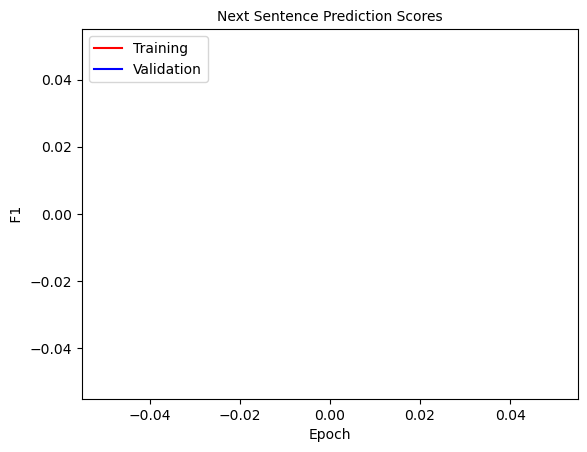

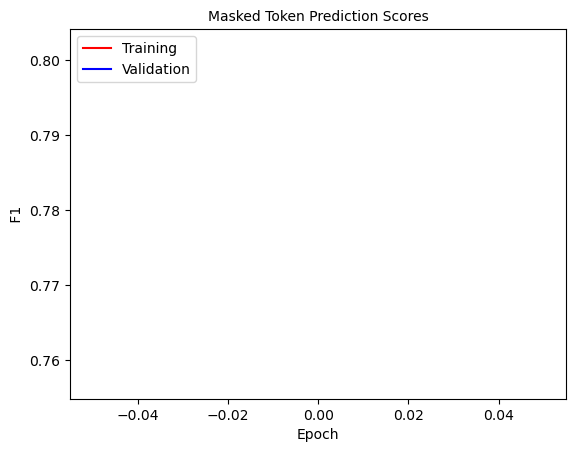

[2024-12-20 17:38:20,950] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1: 100%|██████████| 2000/2000 [27:23<00:00,  1.22it/s, loss=0.214]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this beha

Training:   Instruction f1:  0.0   Masked Token f1:  0.8337079942526895  masked_token_precision:  0.8386834883659173  masked_token_recall:  0.8417317686930239  masked_token_accuracy  0.8417317686930239     SEQ F1 0.939472916934252


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.67it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

1 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9105562405729851 v_seq_accuracy:  0.972623291015625  v_masked_token_precision :  0.9057382617257898 v_masked_token_recall: 0.9209688939994648  V SEQ F1:  0.970126304421412


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


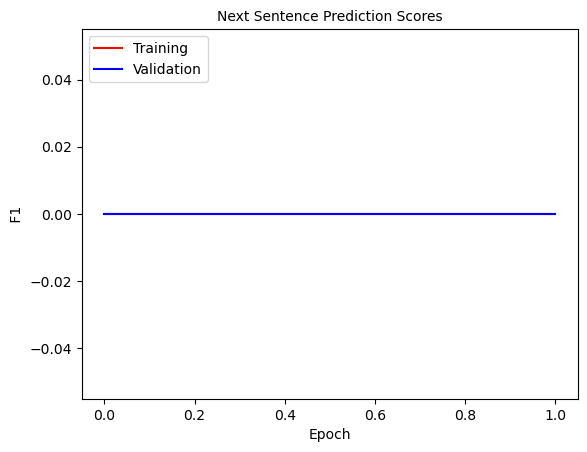

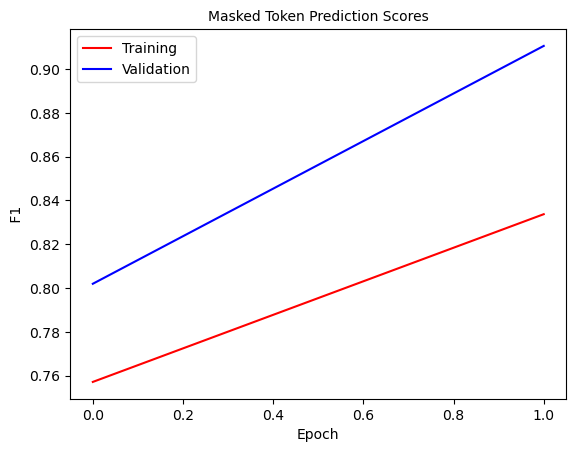

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2: 100%|██████████| 2000/2000 [27:14<00:00,  1.22it/s, loss=0.115]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9232286394042256  masked_token_precision:  0.9184479787360295  masked_token_recall:  0.9309961920156342  masked_token_accuracy  0.9309961920156342     SEQ F1 0.9717379007078327


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:15<00:00,  3.68it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

2 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9418565926870608 v_seq_accuracy:  0.982307421875  v_masked_token_precision :  0.9389893249201066 v_masked_token_recall: 0.9479767393556376  V SEQ F1:  0.9808702517592034


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


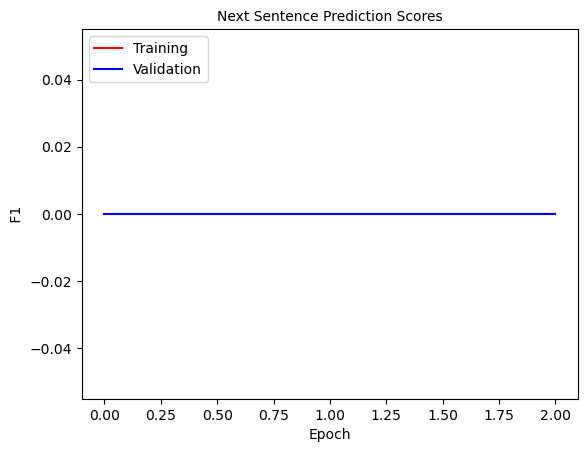

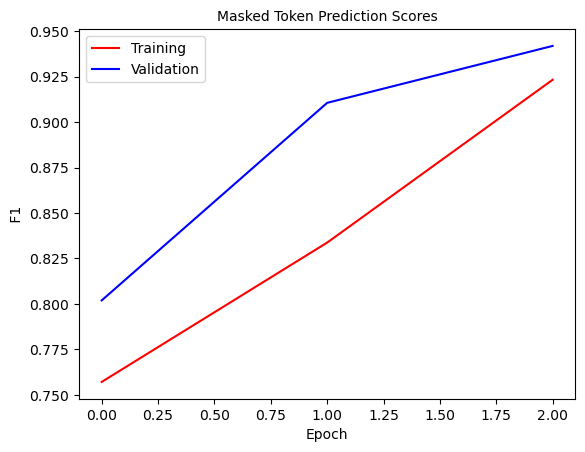

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3: 100%|█████████| 2000/2000 [27:24<00:00,  1.22it/s, loss=0.0786]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9413573129917215  masked_token_precision:  0.9380866473540336  masked_token_recall:  0.946741274820334  masked_token_accuracy  0.946741274820334     SEQ F1 0.9807508132065821


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:15<00:00,  3.70it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

3 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9494813735803908 v_seq_accuracy:  0.986131201171875  v_masked_token_precision :  0.9478270796222216 v_masked_token_recall: 0.9540985784076577  V SEQ F1:  0.9852096438493835


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


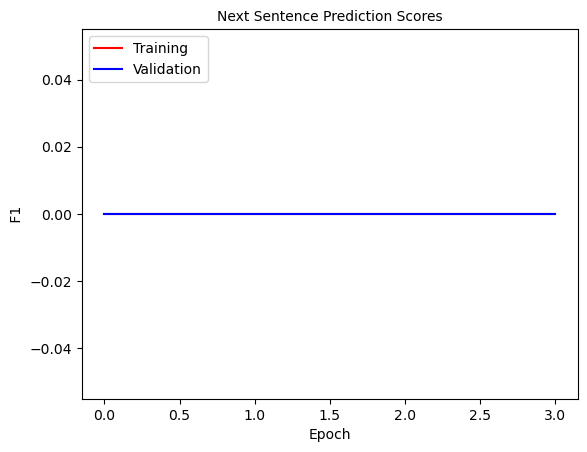

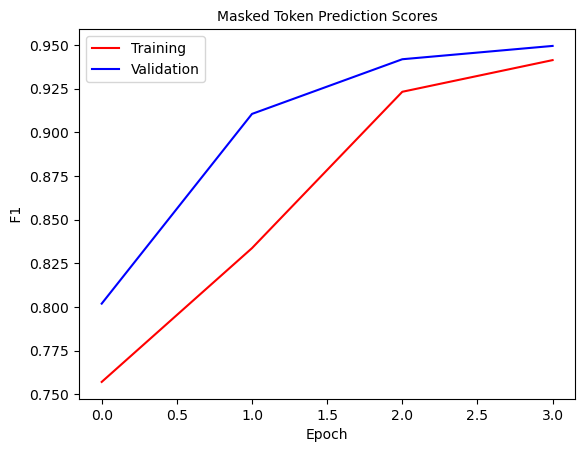

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4: 100%|█████████| 2000/2000 [27:18<00:00,  1.22it/s, loss=0.0592]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9484423653659225  masked_token_precision:  0.9458700826674961  masked_token_recall:  0.952736596132645  masked_token_accuracy  0.952736596132645     SEQ F1 0.9852253564817067


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.66it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

4 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9541348067863905 v_seq_accuracy:  0.988848095703125  v_masked_token_precision :  0.9530145309855802 v_masked_token_recall: 0.9577438789748491  V SEQ F1:  0.9882883391171162


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


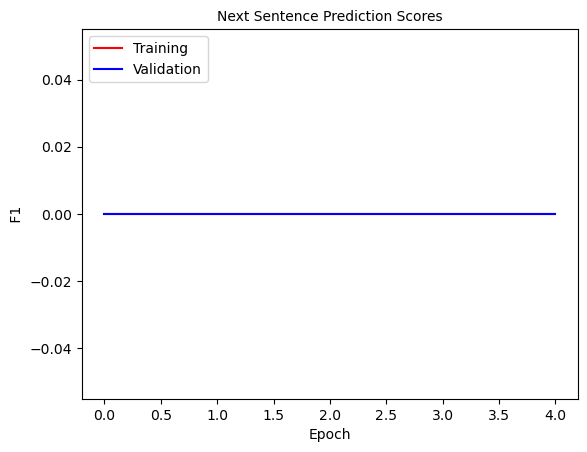

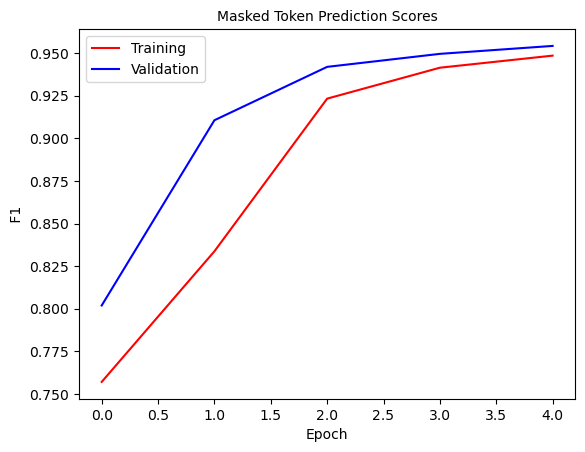

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5: 100%|█████████| 2000/2000 [27:28<00:00,  1.21it/s, loss=0.0478]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9528646224425905  masked_token_precision:  0.950772810459311  masked_token_recall:  0.9564651593354532  masked_token_accuracy  0.9564651593354532     SEQ F1 0.9881089328174572


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.66it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

5 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9571416084071785 v_seq_accuracy:  0.990282177734375  v_masked_token_precision :  0.9561887554517787 v_masked_token_recall: 0.9602376721645148  V SEQ F1:  0.9898782910902728


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


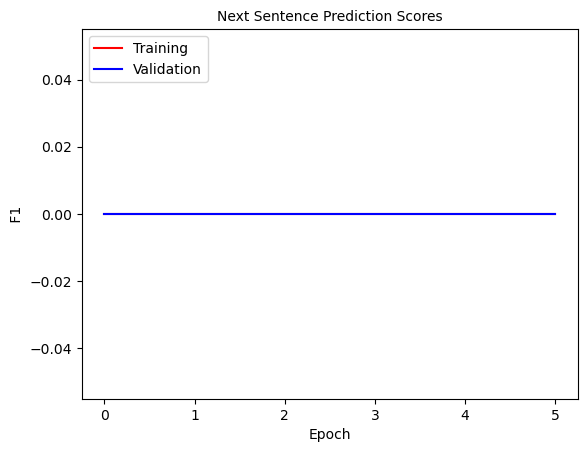

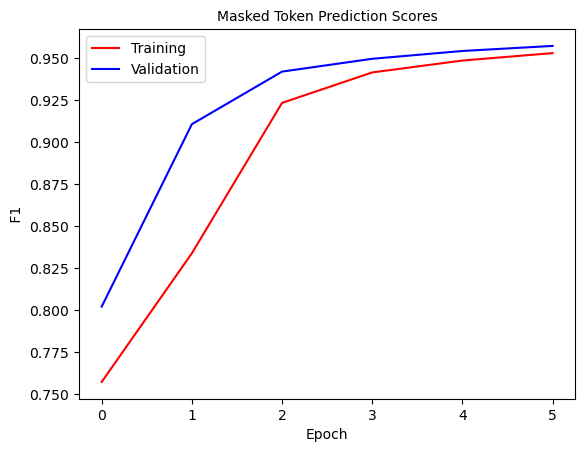

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6: 100%|█████████| 2000/2000 [27:24<00:00,  1.22it/s, loss=0.0391]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9561173178296218  masked_token_precision:  0.9543763449597531  masked_token_recall:  0.95926402296183  masked_token_accuracy  0.95926402296183     SEQ F1 0.9900741971965217


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.67it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

6 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.959114817678484 v_seq_accuracy:  0.991378662109375  v_masked_token_precision :  0.9582289613242021 v_masked_token_recall: 0.9620009076625865  V SEQ F1:  0.9910437855600962


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


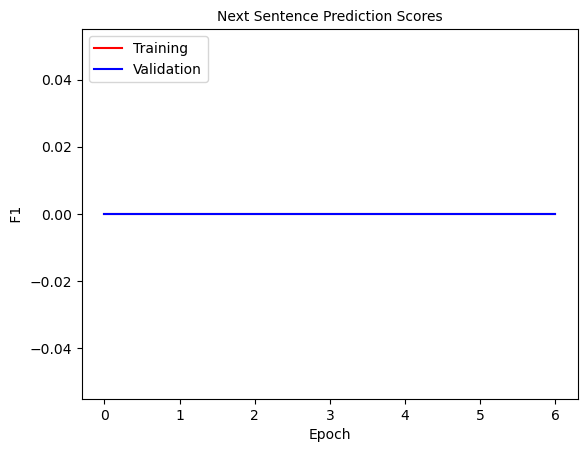

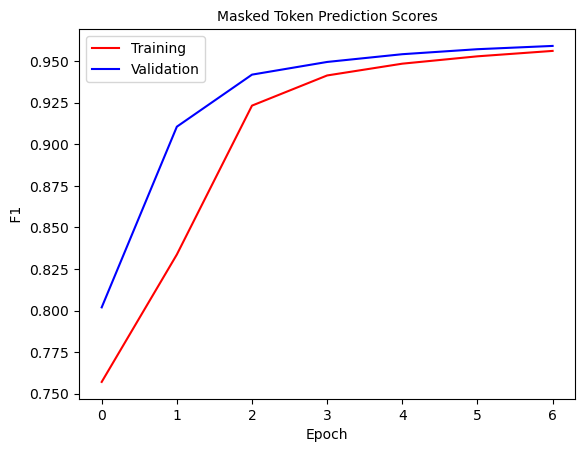

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7: 100%|█████████| 2000/2000 [27:28<00:00,  1.21it/s, loss=0.0341]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9587094143467949  masked_token_precision:  0.9572499778204746  masked_token_recall:  0.9615250035072256  masked_token_accuracy  0.9615250035072256     SEQ F1 0.9914401316759015


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.66it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

7 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9606371357727539 v_seq_accuracy:  0.991963427734375  v_masked_token_precision :  0.9597563671013472 v_masked_token_recall: 0.9633360311444167  V SEQ F1:  0.9916677346997993


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


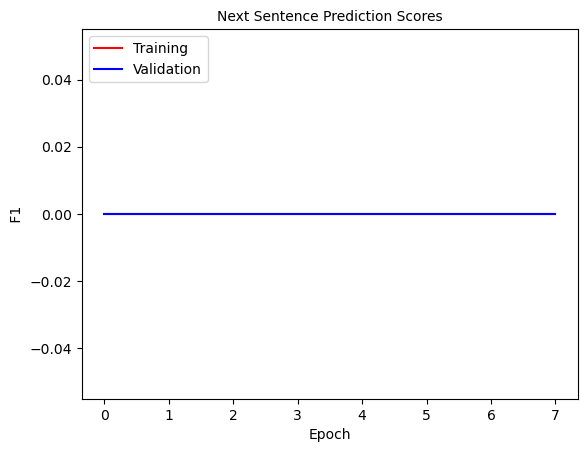

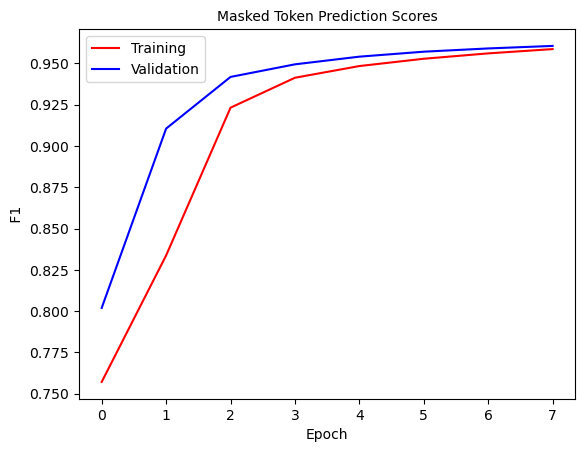

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8: 100%|█████████| 2000/2000 [27:20<00:00,  1.22it/s, loss=0.0311]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9607650819062138  masked_token_precision:  0.9595116992874527  masked_token_recall:  0.9633717896680228  masked_token_accuracy  0.9633717896680228     SEQ F1 0.9923887174992878


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:15<00:00,  3.69it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

8 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9616678028901394 v_seq_accuracy:  0.992503271484375  v_masked_token_precision :  0.9606705403428506 v_masked_token_recall: 0.9642492282589091  V SEQ F1:  0.9922521803031766


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


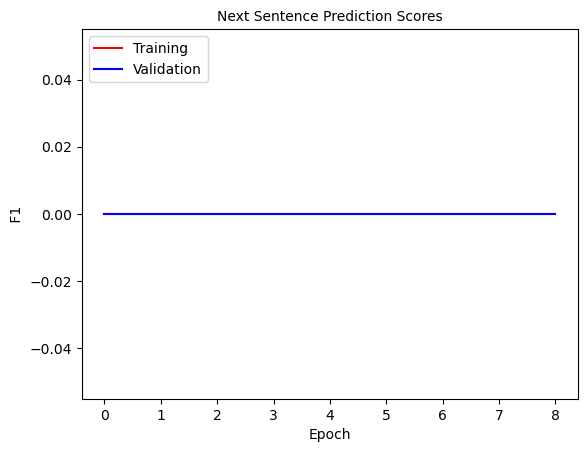

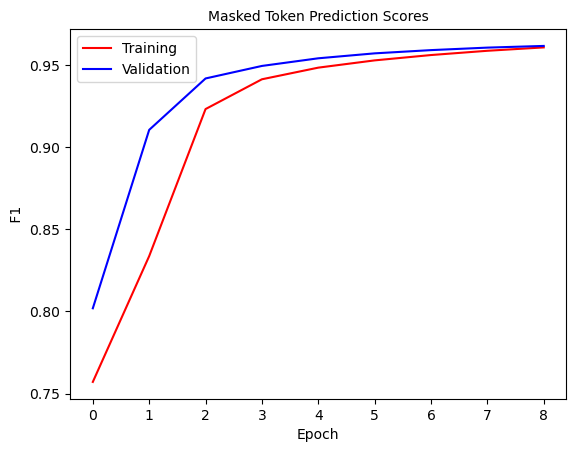

  0%|                                          | 0/2000 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9: 100%|█████████| 2000/2000 [27:28<00:00,  1.21it/s, loss=0.0287]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

Training:   Instruction f1:  0.0   Masked Token f1:  0.9624531133949287  masked_token_precision:  0.9614102565645357  masked_token_recall:  0.9649121208087027  masked_token_accuracy  0.9649121208087027     SEQ F1 0.9930027060139662


  0%|                                           | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_2348521/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████| 500/500 [02:16<00:00,  3.65it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_di

9 Validation:  Instruction F1:  0.0    v_masked_token_ F1:  0.9625012272778003 v_seq_accuracy:  0.992687548828125  v_masked_token_precision :  0.9615330827882497 v_masked_token_recall: 0.9648098433858809  V SEQ F1:  0.9924421513635232


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


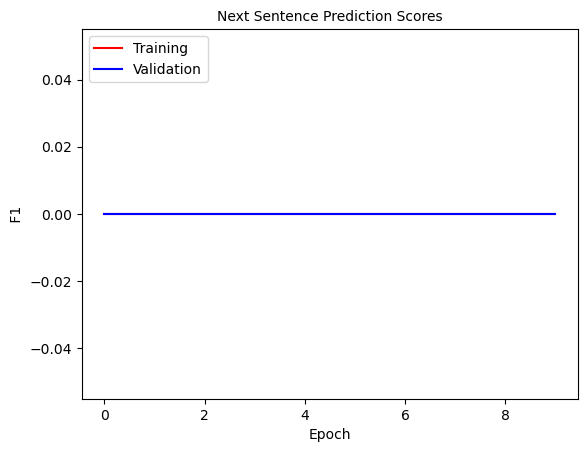

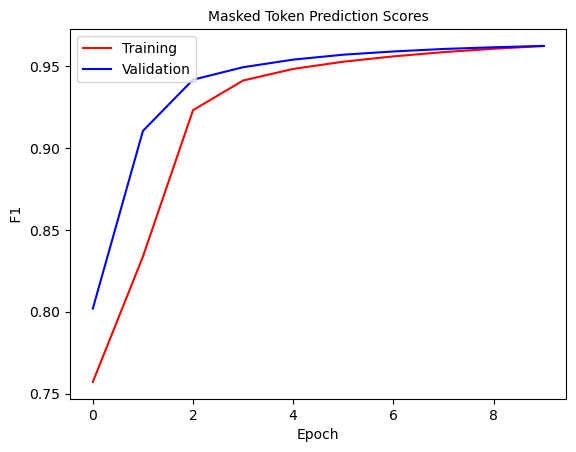

In [26]:


counter = 0

global_instruction_metrices = []
global_masked_token_metrices = []

v_global_instruction_metrices = []
v_global_masked_token_metrices = []


for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    train_loop = tqdm(train_loader, leave=True)
    
    
    instruction_predictions_all, instruction_ground_truths_all = None, None
    masked_token_predictions_all, masked_token_ground_truths_all = None, None
    seq_predictions_all, seq_ground_truths_all = None, None
    
    # activate training mode
    model.train()
    for N,batch in enumerate(train_loop):

        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        next_sentence_label = batch['next_sentence_label'].to(device)
        batch_mask_arr = batch ['mask_arr']
        labels = batch['labels'].to(device)

        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        next_sentence_label=next_sentence_label,
                        labels=labels)


        token_prediction = torch.argmax(outputs.prediction_logits, axis=-1)
       


        # batch_masks = selection [BATCH_SIZE*N : (BATCH_SIZE*(N+1))]
        # print('batch_masks old: ',batch_masks)

        # print(batch ['mask_arr'].shape) #torch.flatten(mask_arr[i].nonzero()).tolist()
        batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in batch_mask_arr]    # torch.flatten(batch ['mask_arr'].nonzero()).tolist()
        # print('batch_masks new: ',batch_masks)
        
        # print("BATCH_SIZE*N : (BATCH_SIZE*(N+1)): ",BATCH_SIZE*N , (BATCH_SIZE*(N+1)) )
        # print("batch_masks:",batch_masks)



        

        masked_token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
        masked_token_prediction = list(chain.from_iterable(masked_token_prediction))
        
        masked_token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
        masked_token_ground_truth = list(chain.from_iterable(masked_token_ground_truth))
        

        # print(token_prediction , token_ground_truth)

        # token_prediction = token_prediction.detach().cpu().numpy().flatten()
        # token_ground_truth = labels.detach().cpu().numpy().flatten()

        # print("token_prediction  : ", token_prediction)
        # print("token_ground_truth: ", token_ground_truth)


        seq_predictions   = token_prediction.detach().cpu().numpy().flatten()
        seq_ground_truths = labels.detach().cpu().numpy().flatten()

        
        instruction_prediction = torch.argmax(outputs.seq_relationship_logits, axis=-1)
        instruction_prediction   = instruction_prediction.detach().cpu().numpy().flatten()
        instruction_ground_truth = next_sentence_label.detach().cpu().numpy().flatten()
        
        if N==0:
            instruction_predictions_all   = instruction_prediction
            instruction_ground_truths_all = instruction_ground_truth
            
            masked_token_predictions_all         = masked_token_prediction
            masked_token_ground_truths_all       = masked_token_ground_truth  


            seq_predictions_all = seq_predictions
            seq_ground_truths_all = seq_ground_truths
            
        else:
            instruction_predictions_all   = np.concatenate((instruction_predictions_all, instruction_prediction))
            instruction_ground_truths_all = np.concatenate((instruction_ground_truths_all, instruction_ground_truth))
            
            masked_token_predictions_all   = np.concatenate((masked_token_predictions_all, masked_token_prediction))
            masked_token_ground_truths_all = np.concatenate((masked_token_ground_truths_all, masked_token_ground_truth))

            seq_predictions_all = np.concatenate((seq_predictions_all, seq_predictions))
            seq_ground_truths_all = np.concatenate((seq_ground_truths_all, seq_ground_truths))
            

        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        scheduler.step()
        # print relevant info to progress bar
        train_loop.set_description(f'Epoch {epoch}')
        train_loop.set_postfix(loss=loss.item())
    
    
    instruction_accuracy = (accuracy_score(instruction_ground_truths_all,instruction_predictions_all))
    instruction_precision, instruction_recall, instruction_f1, _ = precision_recall_fscore_support(instruction_ground_truths_all,instruction_predictions_all, average='binary')
    
    masked_token_accuracy = (accuracy_score(masked_token_ground_truths_all, masked_token_predictions_all))
    masked_token_precision, masked_token_recall, masked_token_f1, _ = precision_recall_fscore_support(masked_token_ground_truths_all,masked_token_predictions_all,average='weighted')

    seq_precision, seq_recall, seq_f1, _ = precision_recall_fscore_support(seq_ground_truths_all,seq_predictions_all,average='weighted')
    
    print("Training: ",  ' Instruction f1: ', instruction_f1 , '  Masked Token f1: ',masked_token_f1 , ' masked_token_precision: ', masked_token_precision, ' masked_token_recall: ', masked_token_recall, ' masked_token_accuracy ', masked_token_accuracy,"    SEQ F1",seq_f1)
    global_instruction_metrices.append(instruction_f1)
    global_masked_token_metrices.append( masked_token_f1) 

    ###########################################
    ###############  EVAL Validation  #########
    ###########################################
    with torch.no_grad():
        model.eval()
#         v_predictions_all, v_ground_truths_all = None, None
        
        v_instruction_predictions_all, v_instruction_ground_truths_all = None, None
        v_masked_token_predictions_all, v_masked_token_ground_truths_all = None, None
        v_seq_predictions_all, v_seq_ground_truths_all = None, None
    
    
        validation_loop = tqdm(validation_loader, leave=True)
        for N,v_batch in enumerate(validation_loop):
            
            
            
            v_input_ids = v_batch['input_ids'].to(device)
            v_token_type_ids = v_batch['token_type_ids'].to(device)
            v_attention_mask = v_batch['attention_mask'].to(device)
            v_next_sentence_label = v_batch['next_sentence_label'].to(device)
            v_mask_arr = v_batch ['mask_arr']
            v_labels = v_batch['labels'].to(device)
            # process
            v_outputs = model(v_input_ids, attention_mask=v_attention_mask,
                            token_type_ids=v_token_type_ids,
                            next_sentence_label=v_next_sentence_label,
                            labels=v_labels)
        
            v_token_prediction = torch.argmax(v_outputs.prediction_logits, axis=-1)

                    

            v_batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in v_mask_arr]
            
            v_masked_token_prediction = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_token_prediction) ]
            v_masked_token_prediction = list(chain.from_iterable(v_masked_token_prediction))
            
            v_masked_token_ground_truth   = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_labels) ]
            v_masked_token_ground_truth = list(chain.from_iterable(v_masked_token_ground_truth))
    
            
            

            v_seq_prediction = v_token_prediction.detach().cpu().numpy().flatten()
            v_seq_ground_truth = v_labels.detach().cpu().numpy().flatten()


            

            # token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
            # token_prediction = list(chain.from_iterable(token_prediction))
            
            # token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
            # token_ground_truth = list(chain.from_iterable(token_ground_truth))

            
            v_instruction_prediction = torch.argmax(v_outputs.seq_relationship_logits, axis=-1)
            v_instruction_prediction   = v_instruction_prediction.detach().cpu().numpy().flatten()
            v_instruction_ground_truth = v_next_sentence_label.detach().cpu().numpy().flatten()



        

            if N==0:
                v_instruction_predictions_all   = v_instruction_prediction
                v_instruction_ground_truths_all = v_instruction_ground_truth

                v_masked_token_predictions_all   = v_masked_token_prediction
                v_masked_token_ground_truths_all = v_masked_token_ground_truth
                
                v_seq_predictions_all= v_seq_prediction
                v_seq_ground_truths_all = v_seq_ground_truth

        

            else:
                v_instruction_predictions_all   = np.concatenate((v_instruction_predictions_all, v_instruction_prediction))
                v_instruction_ground_truths_all = np.concatenate((v_instruction_ground_truths_all, v_instruction_ground_truth))

                v_masked_token_predictions_all   = np.concatenate((v_masked_token_predictions_all, v_masked_token_prediction ))
                v_masked_token_ground_truths_all = np.concatenate((v_masked_token_ground_truths_all, v_masked_token_ground_truth ))
                
                v_seq_predictions_all =np.concatenate((v_seq_predictions_all, v_seq_prediction ))
                v_seq_ground_truths_all =np.concatenate((v_seq_ground_truths_all, v_seq_ground_truth ))
                

            

        v_instruction_accuracy = (accuracy_score(v_instruction_ground_truths_all,v_instruction_predictions_all))
        v_instruction_precision, v_instruction_recall, v_instruction_f1, _ = precision_recall_fscore_support(v_instruction_ground_truths_all,v_instruction_predictions_all, average='binary')


        v_masked_token_accuracy = (accuracy_score(v_masked_token_ground_truths_all, v_masked_token_predictions_all))
        v_masked_token_precision, v_masked_token_recall, v_masked_token_f1, _ = precision_recall_fscore_support(v_masked_token_ground_truths_all,v_masked_token_predictions_all,average='weighted')


        v_seq_accuracy = (accuracy_score(v_seq_predictions_all, v_seq_ground_truths_all))
        v_seq_precision, v_seq_recall, v_seq_f1, _ = precision_recall_fscore_support(v_seq_ground_truths_all,v_seq_predictions_all,average='weighted')
    
        print(epoch,"Validation: ", "Instruction F1: ", v_instruction_f1,  "   v_masked_token_ F1: ",v_masked_token_f1,'v_seq_accuracy: ',v_seq_accuracy,' v_masked_token_precision : ',v_masked_token_precision,'v_masked_token_recall:', v_masked_token_recall," V SEQ F1: ", v_seq_f1)
        
        v_global_instruction_metrices.append(v_instruction_f1)
        v_global_masked_token_metrices.append(v_masked_token_f1) 

    
    plot_graph(global_instruction_metrices, v_global_instruction_metrices, 'Next Sentence Prediction Scores')
    plot_graph(global_masked_token_metrices, v_global_masked_token_metrices, 'Masked Token Prediction Scores')
    model.save_pretrained("./../../models/"+EXPERIMENT_NAME+"_model.ckpt")

In [27]:
a=[0,1,2,3,4,5]
a[0:3]

[0, 1, 2]